In [1]:
import matplotlib.pyplot as plt 
import glob
import os
import numpy as np
import cv2
from helpers.labels import get_SpaceElementClasses, get_SpaceFunctionClasses
from skimage.filters import threshold_otsu
import tensorflow as tf

# ==============================================================================
Author: Amir Ziaee, Georg Suter, Mihael Barada
Copyright: Design Computing Group TU Wien, 2022
Credits: Design Computing Group TU Wien
License: GNU GENERAL PUBLIC LICENSE Version 3
Version: 1.0.1
Maintainer: Amir Ziaee
Email: amir.ziaee@tuwien.ac.at
Status: Prototype
Description: SFS-A68: a dataset for the segmentation of space functions in apartment buildings
Url: https://github.com/A2Amir/SFS-A68
# ==============================================================================


In [2]:
folder_path = './test_results/UnetTransferLearning'
#folder_path = './test_results/UnetTrainingFromScratch'#

In [3]:
SEG_CLASSES = get_SpaceFunctionClasses()
for k,item in SEG_CLASSES.items():
    print(item.id, item.name, item.color)

1 DiningRoom (107,74,101)
2 FamilyRoom (166, 206, 227)
3 LivingRoom (242, 0, 192)
4 Bedroom (0, 255, 248)
5 MasterBedroom (0,175,175)
6 BoxRoom (4,72,148)
7 HomeOffice (194, 123, 160)
8 Shaft (253, 237, 0)
9 StorageRoom (255, 182, 0)
10 WalkInCloset (191, 144, 0)
11 Bathroom (255, 0, 0)
12 Toilet (69, 129, 142)
13 Kitchen (131, 126, 197)
14 LaundryRoom (0, 0, 255)
15 Elevator (9, 244, 156)
16 Stairway (168, 134, 113)
17 Entrance (151, 143, 141)
18 Hallway (125, 62, 32)
19 MainHallway (225, 138, 96)
20 InternalHallway (155, 94, 65)
21 AccessBalcony (255, 255, 22)
22 Loggia (120, 56, 145)


In [4]:
# gt_pred_chanenl_item.id_item.name.bmp <---- 'gt_pred_chanenl_3_LivingRoom.bmp'
img_paths = glob.glob(folder_path + '/**/'+ 'gt_pred_chanenl_1_DiningRoom.bmp', recursive=True) 
img_paths =  sorted(img_paths, key=lambda i: int(os.path.splitext(i.split('\\')[1])[0]))

In [5]:
img_paths

['./test_results/UnetTransferLearning\\0001\\gt_pred_chanenl_1_DiningRoom.bmp',
 './test_results/UnetTransferLearning\\0004\\gt_pred_chanenl_1_DiningRoom.bmp',
 './test_results/UnetTransferLearning\\0005\\gt_pred_chanenl_1_DiningRoom.bmp',
 './test_results/UnetTransferLearning\\0009\\gt_pred_chanenl_1_DiningRoom.bmp',
 './test_results/UnetTransferLearning\\0015\\gt_pred_chanenl_1_DiningRoom.bmp',
 './test_results/UnetTransferLearning\\0030\\gt_pred_chanenl_1_DiningRoom.bmp',
 './test_results/UnetTransferLearning\\0037\\gt_pred_chanenl_1_DiningRoom.bmp',
 './test_results/UnetTransferLearning\\0039\\gt_pred_chanenl_1_DiningRoom.bmp',
 './test_results/UnetTransferLearning\\0040\\gt_pred_chanenl_1_DiningRoom.bmp',
 './test_results/UnetTransferLearning\\0044\\gt_pred_chanenl_1_DiningRoom.bmp',
 './test_results/UnetTransferLearning\\0052\\gt_pred_chanenl_1_DiningRoom.bmp',
 './test_results/UnetTransferLearning\\0063\\gt_pred_chanenl_1_DiningRoom.bmp',
 './test_results/UnetTransferLearning\\0

./test_results/UnetTransferLearning\0001\gt_pred_chanenl_1_DiningRoom.bmp
[0] [0]
1.0


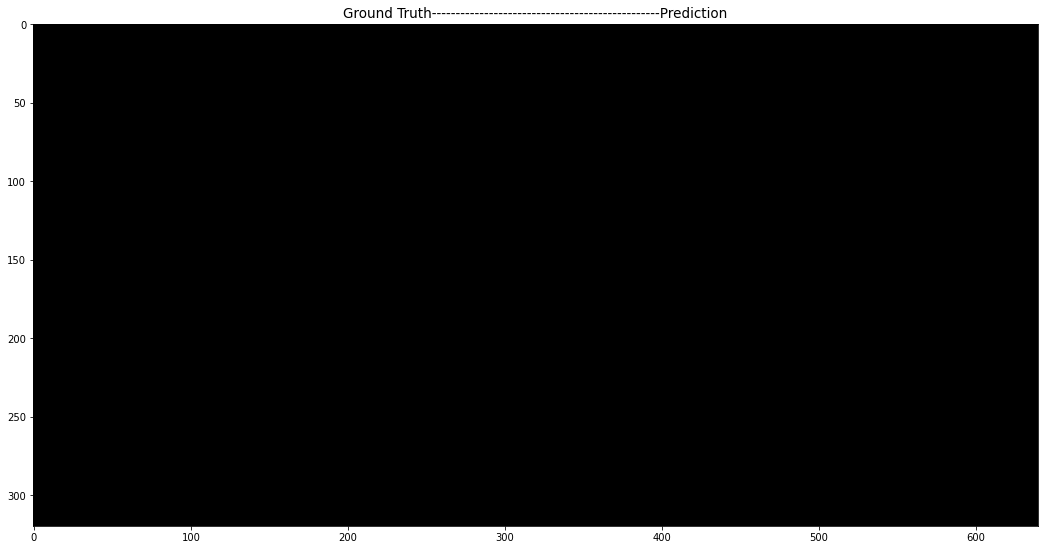

./test_results/UnetTransferLearning\0004\gt_pred_chanenl_1_DiningRoom.bmp
[0] [0]
1.0


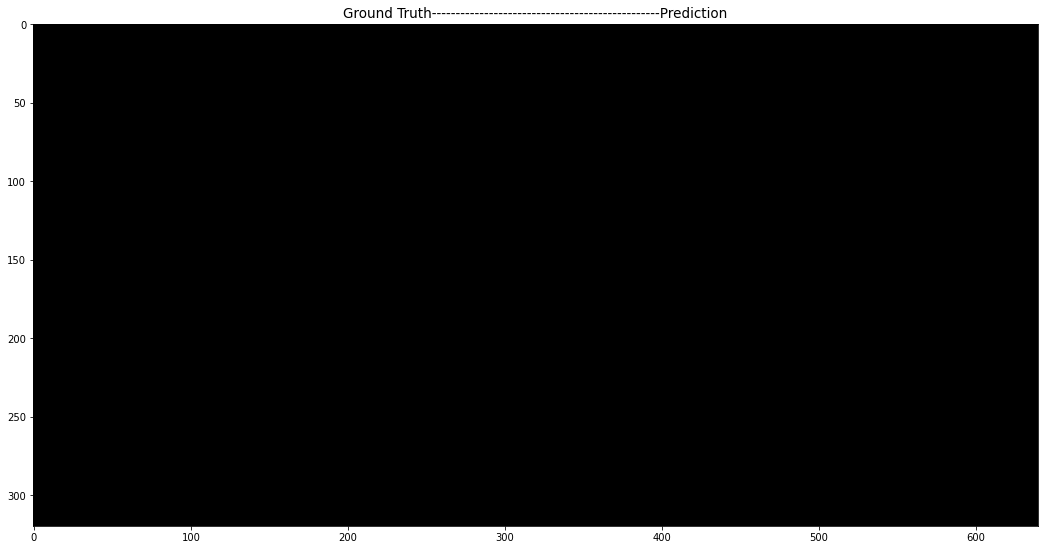

./test_results/UnetTransferLearning\0005\gt_pred_chanenl_1_DiningRoom.bmp
[0] [0]
1.0


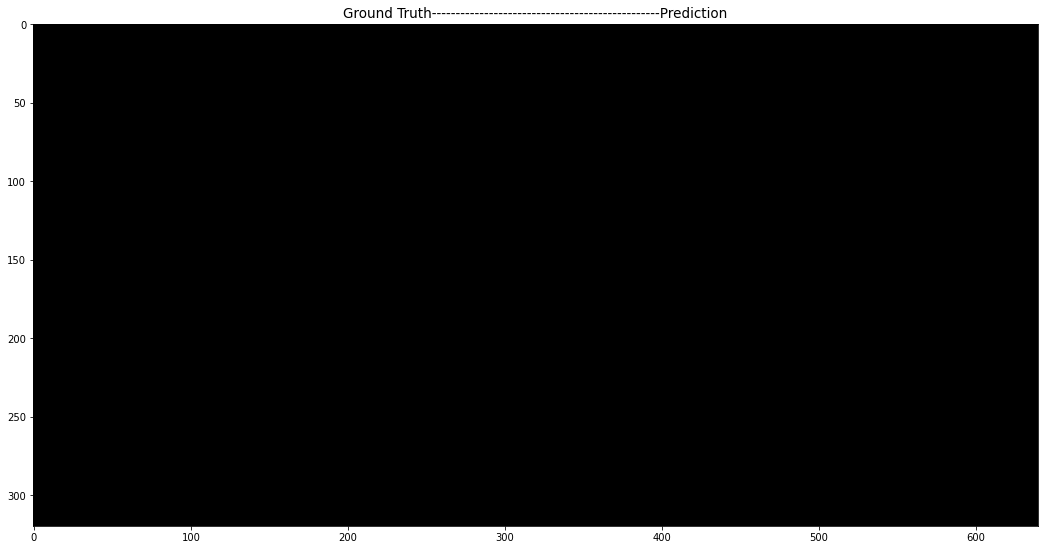

./test_results/UnetTransferLearning\0009\gt_pred_chanenl_1_DiningRoom.bmp
[0] [0]
1.0


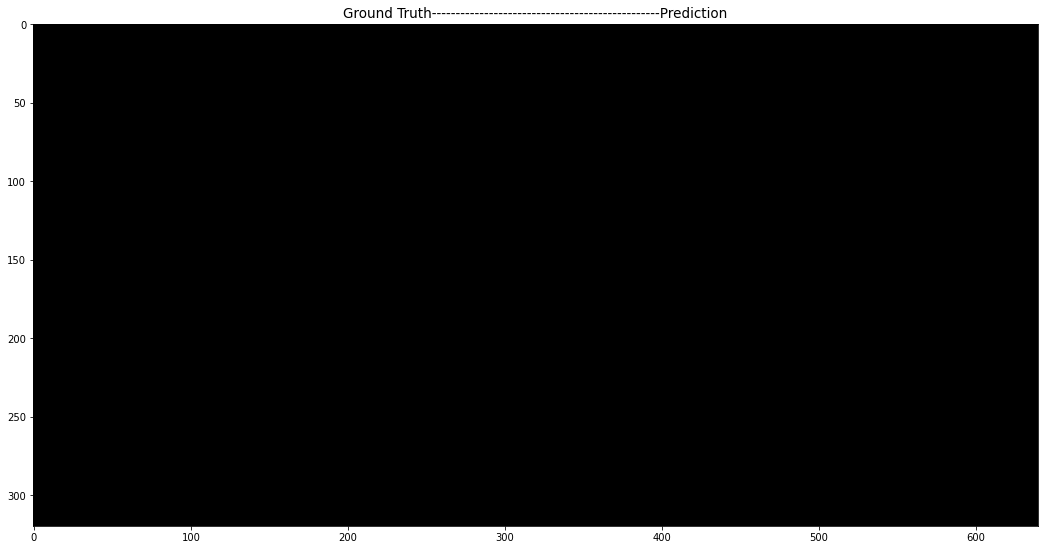

./test_results/UnetTransferLearning\0015\gt_pred_chanenl_1_DiningRoom.bmp
[0] [0]
1.0


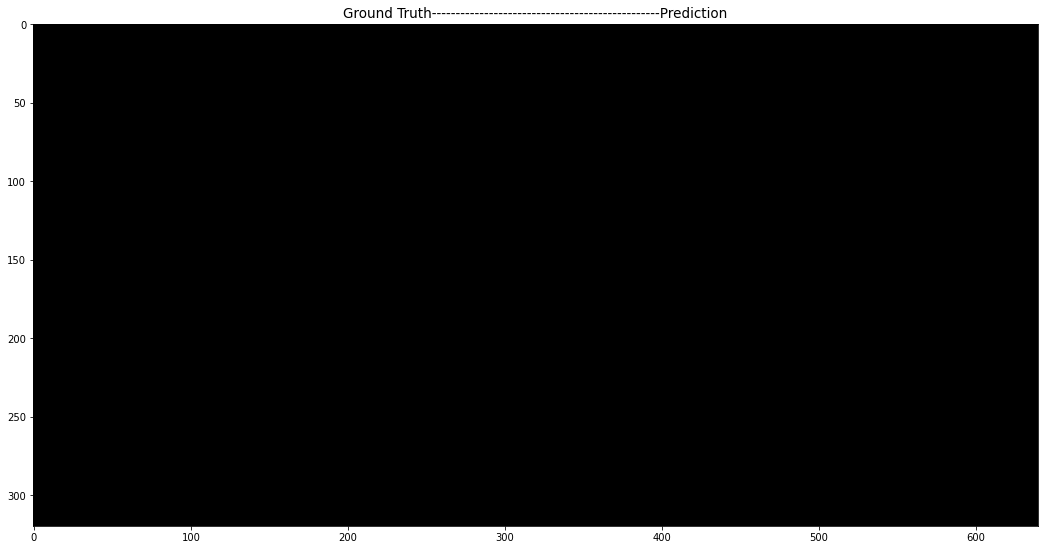

./test_results/UnetTransferLearning\0030\gt_pred_chanenl_1_DiningRoom.bmp
[0] [0]
1.0


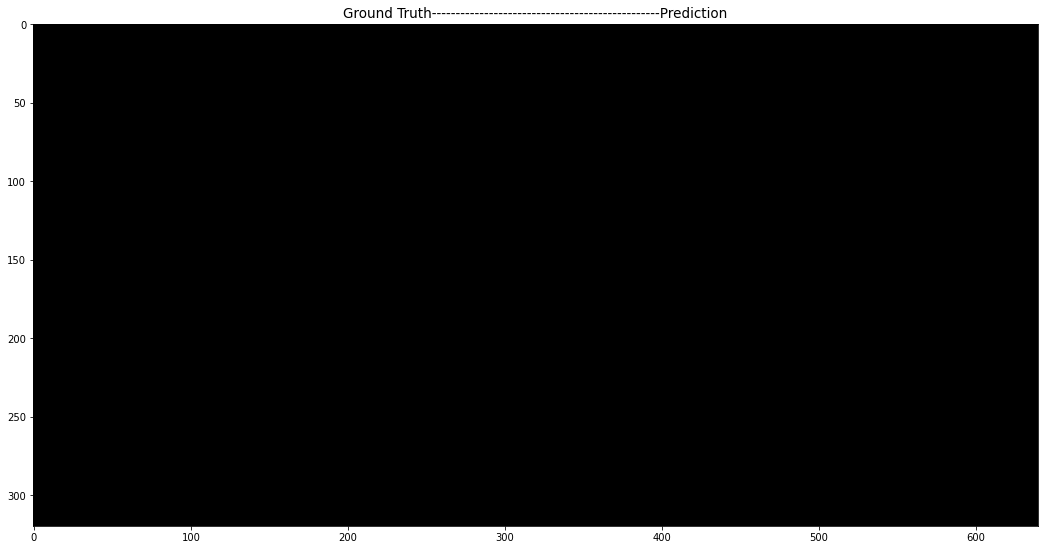

./test_results/UnetTransferLearning\0037\gt_pred_chanenl_1_DiningRoom.bmp
[0] [0]
1.0


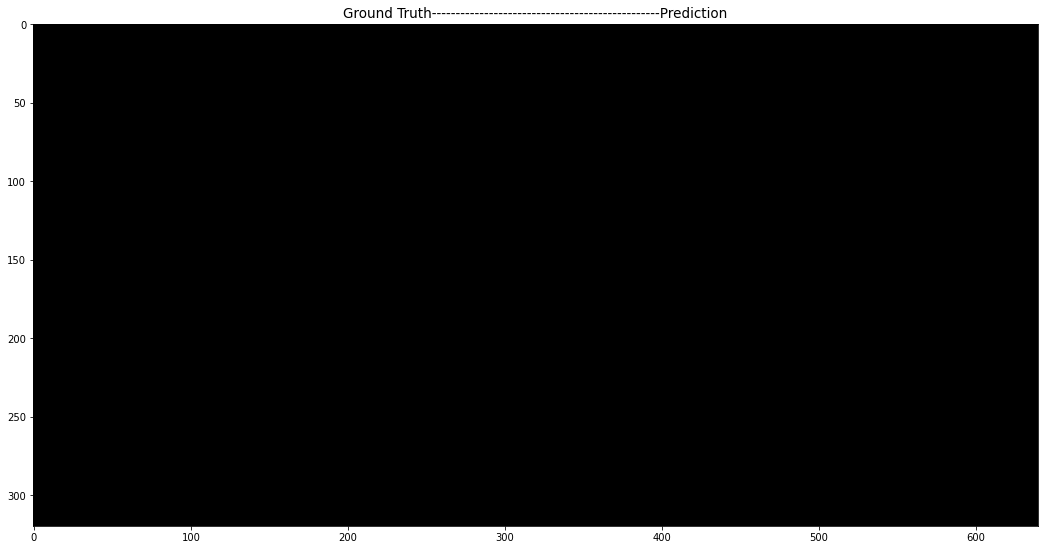

./test_results/UnetTransferLearning\0039\gt_pred_chanenl_1_DiningRoom.bmp
[0] [0]
1.0


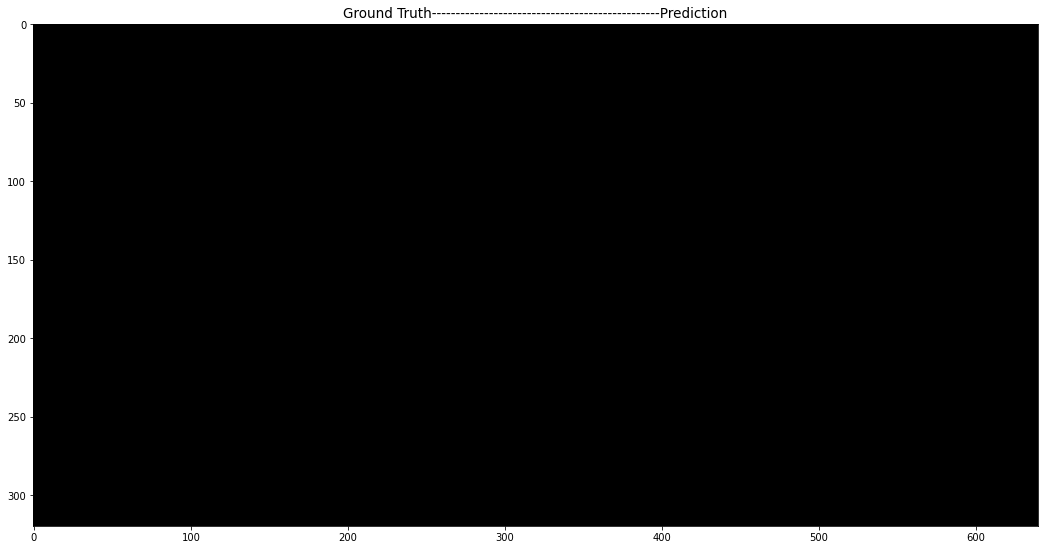

./test_results/UnetTransferLearning\0040\gt_pred_chanenl_1_DiningRoom.bmp
[0] [0]
1.0


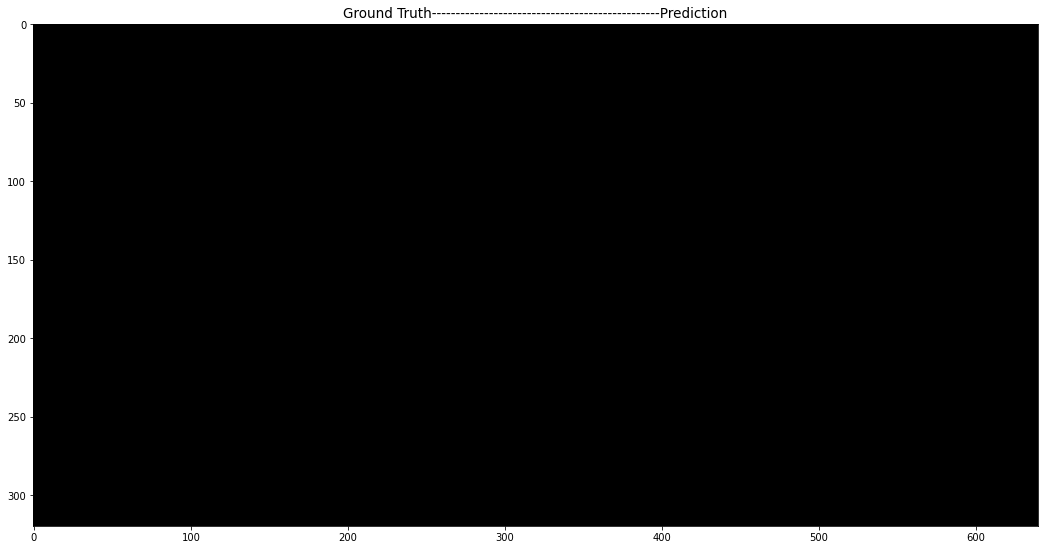

./test_results/UnetTransferLearning\0044\gt_pred_chanenl_1_DiningRoom.bmp
[0] [0]
1.0


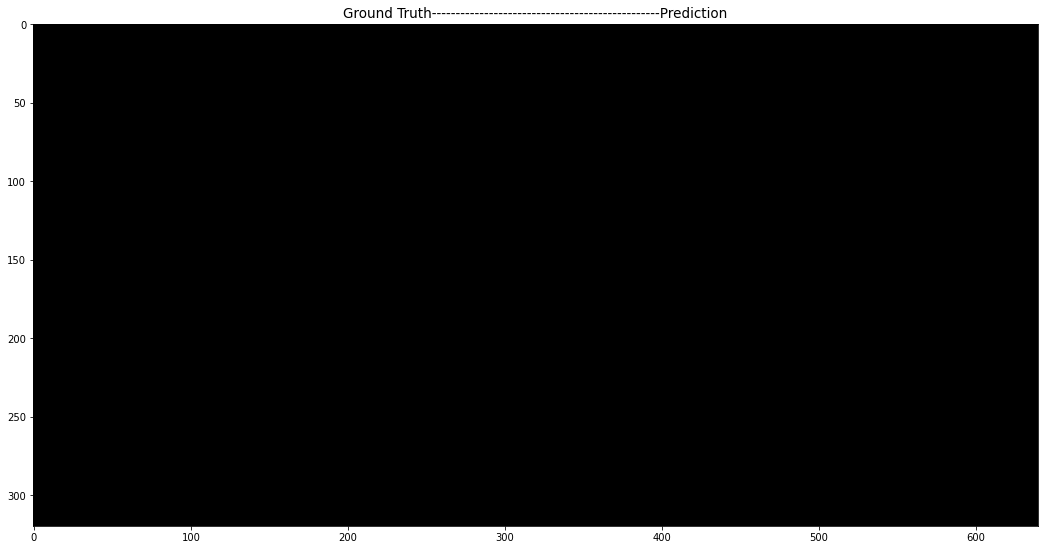

./test_results/UnetTransferLearning\0052\gt_pred_chanenl_1_DiningRoom.bmp
[0] [0]
1.0


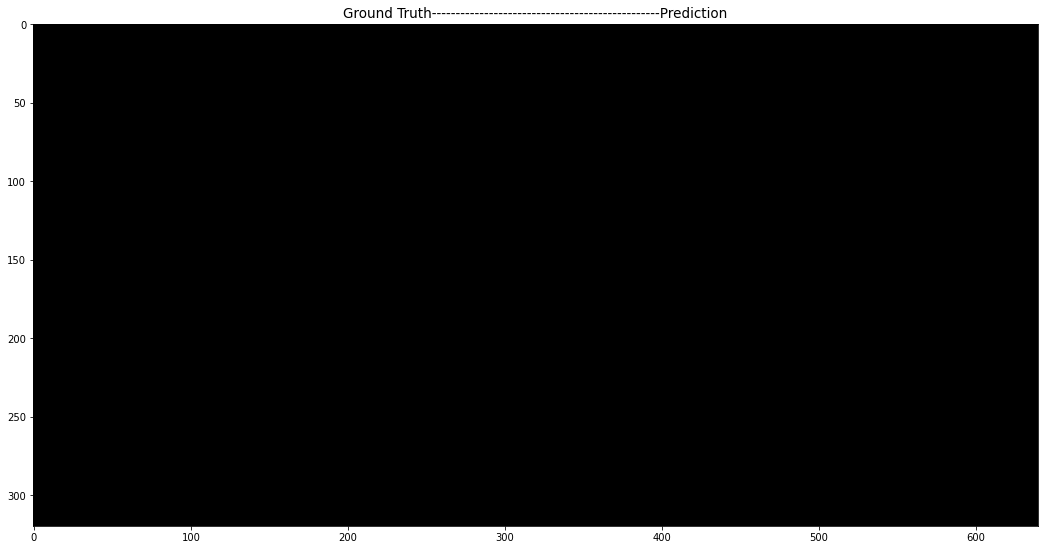

./test_results/UnetTransferLearning\0063\gt_pred_chanenl_1_DiningRoom.bmp
[0] [0]
1.0


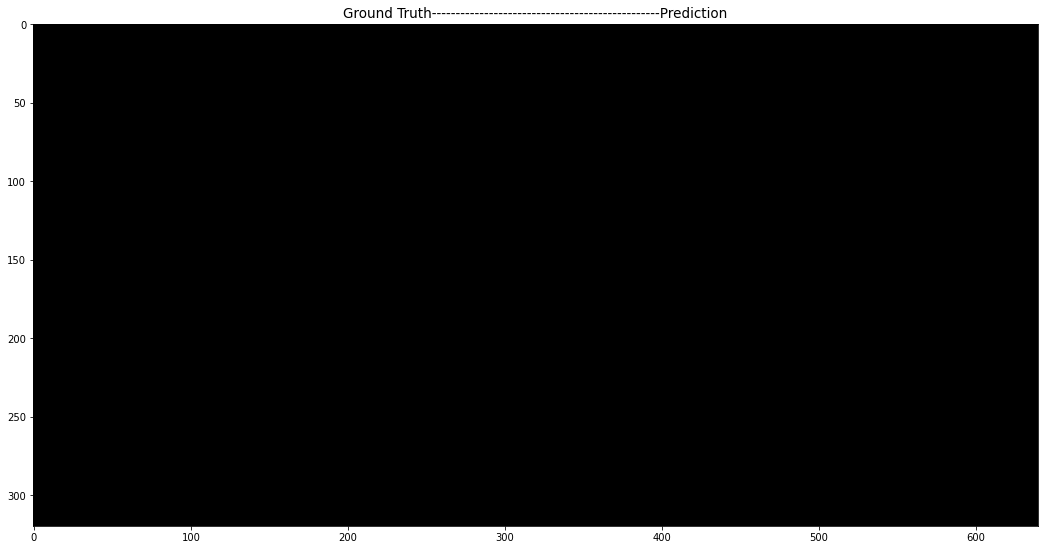

./test_results/UnetTransferLearning\0065\gt_pred_chanenl_1_DiningRoom.bmp
[0 1] [0 1]
0.66267675


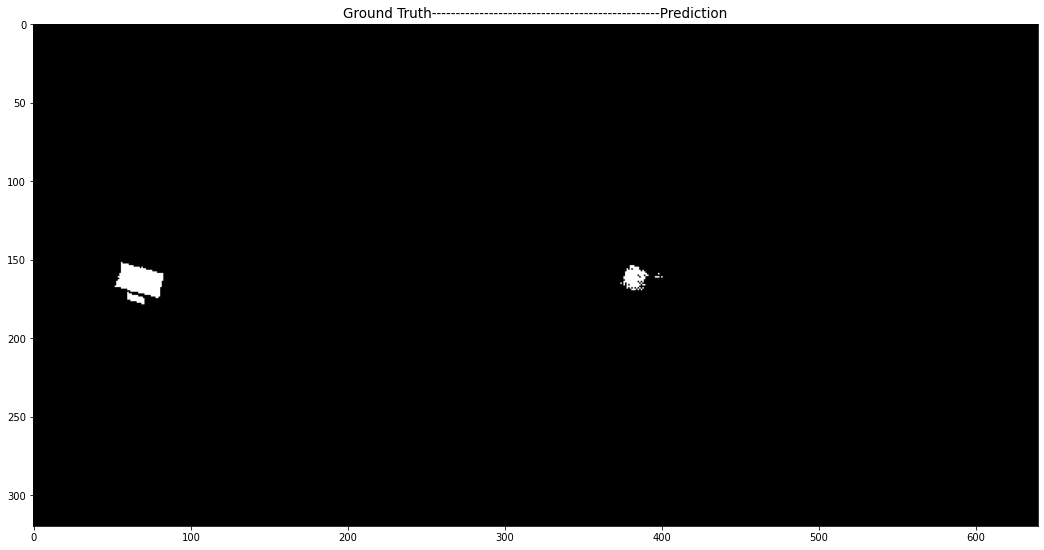

./test_results/UnetTransferLearning\0066\gt_pred_chanenl_1_DiningRoom.bmp
[0] [0]
1.0


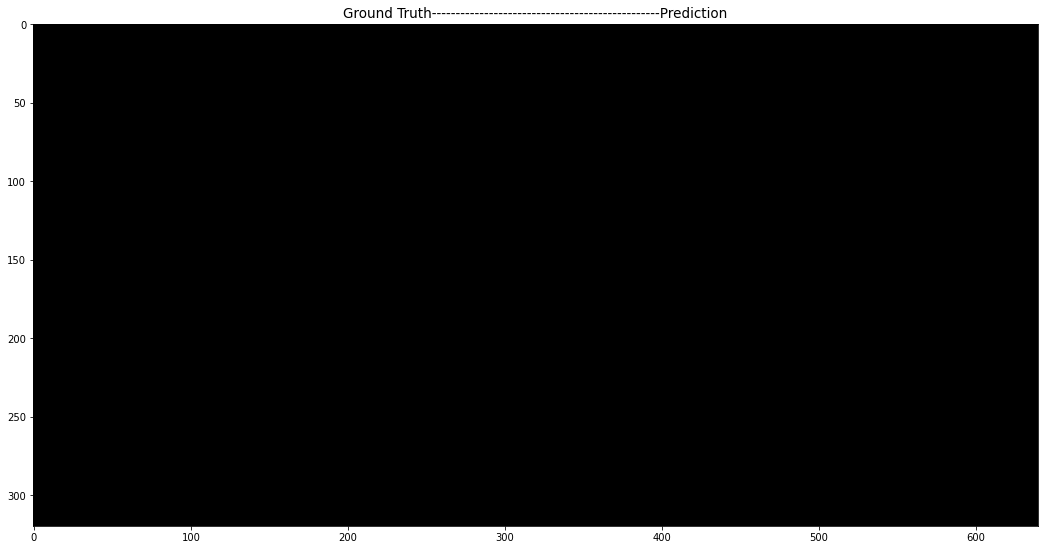

In [6]:

IOUs = []
for path in img_paths:
    print(path)
    plt.figure(figsize=(18,18))

    img = cv2.imread(path, 0)

    gt_img = img[:,:320]
    pred_img = img[:,320:]
    
    ret1,bn_gt_img = cv2.threshold(gt_img,0,1, cv2.THRESH_BINARY)
    ret2, bn_pred_img = cv2.threshold(pred_img,0,1, cv2.THRESH_BINARY)
    print(np.unique(bn_gt_img), np.unique(bn_pred_img))
    
    m = tf.keras.metrics.BinaryIoU(target_class_ids=[0,1])
    m.update_state(bn_gt_img, bn_pred_img)
    print(m.result().numpy())
    
    plt.title('Ground Truth------------------------------------------------Prediction', fontsize=13.5)
    plt.imshow(img, cmap=plt.cm.gray)
    plt.show()